In [6]:
import numpy as np
def generate_linear(n=100):
	import numpy as np
	pts = np.random.uniform(0, 1, (n, 2))
	inputs = []
	labels = []
	for pt in pts:
		inputs.append([pt[0], pt[1]])
		distance = (pt[0]-pt[1])/1.414
		if pt[0] > pt[1]:
			labels.append(0)
		else:
			labels.append(1)
	return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
	inputs = []
	labels = []
	for i in range(11):
		inputs.append([0.1*i,0.1*i])
		labels.append(0)

		if 0.1*i == 0.5:
			continue
		inputs.append([0.1*i, 1-0.1*i])
		labels.append(1)
	return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y,pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i]==0:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if(abs(Y_hat[0][i]-1) < 0.005):
            pred_y[0][i] = 1
        elif(abs(Y_hat[0][i]-0) < 0.005):
            pred_y[0][i] = 0
        if pred_y[0][i] ==0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        params_values['W' + str(layer_idx)] = abs(np.random.randn(layer_output_size, layer_input_size) * 0.1)
    return params_values

def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr =np.transpose(X)
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        W_curr = params_values["W" + str(layer_idx)]
        A_curr = sigmoid(np.dot(W_curr,A_prev))
        Z_curr = np.dot(W_curr,A_prev)
        #print(idx,A_prev)
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

def sigmoid(Z):
    return 1.0/(1.0+np.exp(-Z))

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def get_cost_value(Y_hat, Y):
    # number of examples
    m = Y_hat.shape[1]
    # calculation of the cost according to the formula
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def get_accuracy_value(Y_hat,Y):
    wrong = 0
    for i in range(len(Y_hat[0])):
        #print(Y_hat[0][i],Y[0][i])
        if(abs(Y_hat[0][i]-Y[0][i])>0.005):
            wrong +=1
    return (len(Y_hat[0])-wrong)/len(Y_hat[0])

In [7]:
def single_layer_backward_propagation(dA_curr, W_curr, Z_curr, A_prev):
    # number of examples
    m = A_prev.shape[1]
    
    # calculation of the activation function derivative
    dZ_curr = sigmoid_backward(dA_curr, Z_curr)
    # derivative of the matrix W
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    # derivative of the matrix A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)
    return dA_prev, dW_curr

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        dA_curr = dA_prev
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]

        dA_prev, dW_curr = single_layer_backward_propagation(
            dA_curr, W_curr, Z_curr, A_prev)   
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
    return grads_values


In [8]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    for layer_idx, layer in enumerate(nn_architecture):
               
        #print(params_values["W" + str(layer_idx+1)].shape,params_values["W" + str(layer_idx+1)])
        #print(grads_values["dW" + str(layer_idx+1)].shape,grads_values["dW" + str(layer_idx+1)])
        #print(0.1 * grads_values["dW" + str(layer_idx+1)] )
        params_values["W" + str(layer_idx+1)] -=learning_rate*grads_values["dW" + str(layer_idx+1)] 
    return params_values;

epoch =0 cost =0.6923406165344196 accu =0.0
epoch =10000 cost =0.0017573376214678053 accu =0.98
epoch =20000 cost =0.000657957880913636 accu =0.98
epoch =30000 cost =0.0003683228413383988 accu =0.98
epoch =40000 cost =0.0002452570679116494 accu =0.98
epoch =50000 cost =0.0001797247117116938 accu =0.98
epoch =60000 cost =0.00013988027494183131 accu =0.98
epoch =70000 cost =0.00011344760842384414 accu =0.98
epoch =80000 cost =9.479830557664427e-05 accu =1.0


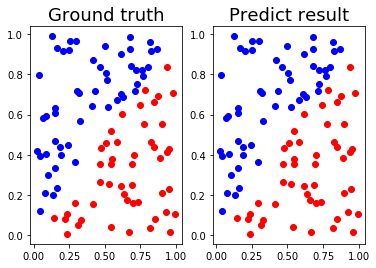

In [9]:
X,Y = generate_linear(100)  
#X,Y = generate_XOR_easy()
nn_architecture = [
    {"input_dim": 2, "output_dim": 4},
    {"input_dim": 4, "output_dim": 4},
    {"input_dim": 4, "output_dim": 1}
]
params_values = init_layers(nn_architecture)
learning_rate = 1
Y_hat = Y
for i in range(200001):
    Y_hat, cashe = full_forward_propagation(X,params_values, nn_architecture)
    cost = get_cost_value(Y_hat, Y.T)
    if(cost<0.0005):
        learning_rate =1
    grads_val = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
    params_val = update(params_values, grads_val, nn_architecture, learning_rate)
    if(i%10000==0):
        accu = get_accuracy_value(Y_hat, Y.T)
        print('epoch ='+str(i)+' cost ='+str(cost)+' accu ='+str(accu))
        if(accu ==1):
            break;
    #print("\n",Y_hat.shape,"\n",Y_hat)

show_result(X, Y,Y_hat)

epoch =0 cost =0.6963296601571213 accu =0.0
epoch =10000 cost =0.6920129741167282 accu =0.0
epoch =20000 cost =0.6920129662057138 accu =0.0
epoch =30000 cost =0.6920129596006269 accu =0.0
epoch =40000 cost =0.6920129529839482 accu =0.0
epoch =50000 cost =0.6920129452178303 accu =0.0
epoch =60000 cost =0.6920129347326011 accu =0.0
epoch =70000 cost =0.6920129184131419 accu =0.0
epoch =80000 cost =0.6920128879728743 accu =0.0
epoch =90000 cost =0.6920128111822125 accu =0.0
epoch =100000 cost =0.6920123961145279 accu =0.0
epoch =110000 cost =0.0005878595727402181 accu =1.0


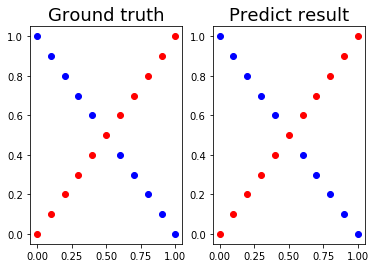

In [12]:
X,Y = generate_XOR_easy()
nn_architecture = [
    {"input_dim": 2, "output_dim": 4},
    {"input_dim": 4, "output_dim": 4},
    {"input_dim": 4, "output_dim": 1}
]
params_values = init_layers(nn_architecture)

learning_rate = 5
for i in range(100000000):
    Y_hat, cashe = full_forward_propagation(X,params_values, nn_architecture)
    #print(Y_hat,Y)
    cost = get_cost_value(Y_hat, Y.T)
    grads_val = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
    params_val = update(params_values, grads_val, nn_architecture, learning_rate)
    if(i%10000==0):
        accu = get_accuracy_value(Y_hat, Y.T)
        print('epoch ='+str(i)+' cost ='+str(cost)+' accu ='+str(accu))
        if(accu ==1):
            break;
    #print("\n",Y_hat.shape,"\n",Y_hat)
show_result(X, Y,Y_hat)

epoch =0 cost =0.6963296601571213 accu =0.0
epoch =10000 cost =0.6920129836417577 accu =0.0
epoch =20000 cost =0.6920129809443268 accu =0.0
epoch =30000 cost =0.6920129785064699 accu =0.0
epoch =40000 cost =0.6920129762836073 accu =0.0
epoch =50000 cost =0.6920129742392286 accu =0.0
epoch =60000 cost =0.6920129723430485 accu =0.0
epoch =70000 cost =0.6920129705696305 accu =0.0
epoch =80000 cost =0.6920129688973456 accu =0.0
epoch =90000 cost =0.6920129673075736 accu =0.0
epoch =100000 cost =0.6920129657840743 accu =0.0
epoch =110000 cost =0.6920129643124925 accu =0.0
epoch =120000 cost =0.6920129628799536 accu =0.0
epoch =130000 cost =0.6920129614747315 accu =0.0
epoch =140000 cost =0.6920129600859685 accu =0.0
epoch =150000 cost =0.6920129587034326 accu =0.0
epoch =160000 cost =0.6920129573173011 accu =0.0
epoch =170000 cost =0.6920129559179607 accu =0.0
epoch =180000 cost =0.6920129544958187 accu =0.0
epoch =190000 cost =0.6920129530411137 accu =0.0
epoch =200000 cost =0.692012951543

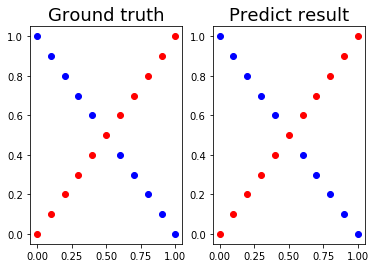

In [13]:
X,Y = generate_XOR_easy()
nn_architecture = [
    {"input_dim": 2, "output_dim": 4},
    {"input_dim": 4, "output_dim": 4},
    {"input_dim": 4, "output_dim": 1}
]
params_values = init_layers(nn_architecture)

learning_rate = 1
for i in range(100000000):
    Y_hat, cashe = full_forward_propagation(X,params_values, nn_architecture)
    #print(Y_hat,Y)
    cost = get_cost_value(Y_hat, Y.T)
    grads_val = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
    params_val = update(params_values, grads_val, nn_architecture, learning_rate)
    if(i%10000==0):
        accu = get_accuracy_value(Y_hat, Y.T)
        print('epoch ='+str(i)+' cost ='+str(cost)+' accu ='+str(accu))
        if(accu ==1):
            break;
    #print("\n",Y_hat.shape,"\n",Y_hat)
show_result(X, Y,Y_hat)